# Import packages and load params

In [1]:
import yaml
import sys
import os

## First go back up a folder 
import os
#os.chdir('..')
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm
### notebook specific configuration ###
from os.path import basename
#mpl.style.use('ggplot')
mpl.style.use('fivethirtyeight')
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

In [2]:
meta_samples = pd.read_csv('meta_samples.csv',index_col=0)
meta_samples.head()

,Experiment,Full,Short,Short_with_number,Tissue
BMDMwt/GRO/f04_peaks/merge_bg_2.peak,GRO,/data/isshamie/TSS/Processed/BMDMwt/GRO/f04_pe...,BMDMwt_GRO,BMDMwt_GRO1,BMDMwt
Brain/GRO/f04_peaks/merge_bg_2.peak,GRO,/data/isshamie/TSS/Processed/Brain/GRO/f04_pea...,Brain_GRO,Brain_GRO1,Brain
Brain/mSTART/f04_peaks/merge_bg_2.peak,mSTART,/data/isshamie/TSS/Processed/Brain/mSTART/f04_...,Brain_mSTART,Brain_mSTART1,Brain
Heart/mSTART/f04_peaks/merge_bg_2.peak,mSTART,/data/isshamie/TSS/Processed/Heart/mSTART/f04_...,Heart_mSTART,Heart_mSTART1,Heart
Kidney/GRO/f04_peaks/merge_bg_2.peak,GRO,/data/isshamie/TSS/Processed/Kidney/GRO/f04_pe...,Kidney_GRO,Kidney_GRO1,Kidney


## Load Parameter file

In [3]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'



with open(parameter_file,'r') as f:
    doc = yaml.load(f)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
gff_f=doc['annotation']
annotation_gtf=doc['annotation_gtf']

RNA_dir = os.path.join(data_folder,'RNA_Total')



## Load Developing Modules

In [4]:
from Modules.Homer import *

In [5]:
sys.path.append('/data/isshamie/TSS/Analysis/src')
import helper

### Tissues with totalRNA

In [6]:
tissues_with_RNA = {
    'MiscOrgans': 'Misc',
    'FemaleReproductive':'ReproductiveTract',
    'Brain':'Brain',
    'Lung':'Lung',
    'Liver':'Liver',
    'Spleen':'Spleen',
    'Muscle':'Muscle'    
}

## Example Case here

In [7]:
t = 'CHO'
s = 'GRO'
out_dir = './'

in_dir = '/data/isshamie/TSS/Processed/CHO/GRO/'

In [8]:

gff_f = '/data/genome/hamster/picr/updated_final_sort.gff3'

# 5' file
raw_f = 'CHO-5GRO-SD371_S10_R1_001.fastq.gz'
trim_f = 'trim_CHO-5GRO-SD371_S10_R1_001.fastq.gz'
align_f = 'f02_bam/trim_CHO-5GRO-SD371_S10_R1_001.bam'
tag_f = 'f03_tags/trim_CHO-5GRO-SD367_S6_R1_001'

# input file
in_raw_f = 'CHO-GRO-SD370_S9_R1_001.fastq.gz'
in_trim_f = 'trim_CHO-GRO-SD370_S9_R1_001.fastq.gz'
in_align_f = 'f02_bam/CHO-GRO-SD370_S9_R1_001.bam'
in_tag_f = 'f03_tags/trim_CHO-GRO-SD370_S9_R1_001'

In [9]:
def run_process(raw_f,trim_f,align_f,tag_f):
    trim_cmd = 'cutadapt --minimum-length 10 -a file:/data/isshamie/TSS/universal_adaptor.fa \
    {raw_f} -o {trim_f}'.format(raw_f=raw_f,trim_f=trim_f) #--cores=3
    !{trim_cmd}


    align_cmd = 'STAR --genomeDir /data/genome/hamster/picr/picr_STAR_Db\
    --readFilesCommand zcat --readFilesIn {trim_f} --runThreadN 6 --outFileNamePrefix\
    {align_f} --outSAMstrandField intronMotif --outFilterIntronMotifs RemoveNoncanonical\
    --outSAMtype BAM SortedByCoordinate --sjdbGTFfile {gff_f}\
    --sjdbGTFtagExonParentTranscript Parent'.format(trim_f=trim_f,align_f=align_f,gff_f = gff_f)
    print(align_cmd)
    !{align_cmd}
    
    tag_f = 'f03_tags/trim_CHO-5GRO-SD367_S6_R1_001.fastq'
    tag_cmd = 'makeTagDirectory {tag_f} -genome /data/genome/hamster/picr/picr.fa -checkGC -single \
    {align_f}'.format(tag_f=tag_f,align_f=align_f)
    print(tag_cmd)
    
    return

In [ ]:
run_process(raw_f,trim_f,align_f,tag_f)

This is cutadapt 1.16 with Python 2.7.13
Command line parameters: --minimum-length 10 -a file:/data/isshamie/TSS/universal_adaptor.fa CHO-5GRO-SD371_S10_R1_001.fastq.gz -o trim_CHO-5GRO-SD371_S10_R1_001.fastq.gz
Running on 1 core
Trimming 2 adapters with at most 10.0% errors in single-end mode ...
Finished in 780.12 s (33 us/read; 1.81 M reads/minute).

=== Summary ===

Total reads processed:              23,480,806
Reads with adapters:                13,163,002 (56.1%)
Reads that were too short:             111,417 (0.5%)
Reads written (passing filters):    23,369,389 (99.5%)

Total basepairs processed: 1,784,541,256 bp
Total written (filtered):  1,539,672,189 bp (86.3%)

=== Adapter TruSeq ===

Sequence: AGATCGGAAGAGCACACGTCT; Type: regular 3'; Length: 21; Trimmed: 8979907 times.

No. of allowed errors:
0-9 bp: 0; 10-19 bp: 1; 20-21 bp: 2

Bases preceding removed adapters:
  A: 8.2%
  C: 9.9%
  G: 17.9%
  T: 64.0%
  none/other: 0.0%

Overview of removed sequences
length	count	expect	

In [ ]:
run_process(in_raw_f,in_trim_f,in_align_f,in_tag_f)

This is cutadapt 1.16 with Python 2.7.13
Command line parameters: --minimum-length 10 -a file:/data/isshamie/TSS/universal_adaptor.fa CHO-GRO-SD370_S9_R1_001.fastq.gz -o trim_CHO-GRO-SD370_S9_R1_001.fastq.gz
Running on 1 core
Trimming 2 adapters with at most 10.0% errors in single-end mode ...


# Trim, Align and make tags

In [ ]:
# 
raw_f = 'CHO-5GRO-SD371_S10_R1_001.fastq.gz'
trim_f = 'trim_CHO-5GRO-SD371_S10_R1_001.fastq.gz'

trim_cmd = 'cutadapt --minimum-length 10 -a file:/data/isshamie/TSS/universal_adaptor.fa \
{raw_f} -o {trim_f}'.format(raw_f=raw_f,trim_f=trim_f) #--cores=3

print(trim_cmd)
!{trim_cmd}

cutadapt --minimum-length 10 -a file:/data/isshamie/TSS/universal_adaptor.fa CHO-5GRO-SD371_S10_R1_001.fastq.gz -o trim_CHO-5GRO-SD371_S10_R1_001.fastq.gz
This is cutadapt 1.16 with Python 2.7.13
Command line parameters: --minimum-length 10 -a file:/data/isshamie/TSS/universal_adaptor.fa CHO-5GRO-SD371_S10_R1_001.fastq.gz -o trim_CHO-5GRO-SD371_S10_R1_001.fastq.gz
Running on 1 core
Trimming 2 adapters with at most 10.0% errors in single-end mode ...


In [16]:
align_f = 'f02_bam/trim_CHO-5GRO-SD371_S10_R1_001.bam'
gff_f = '/data/genome/hamster/picr/updated_final_sort.gff3'

align_cmd = 'STAR --genomeDir /data/genome/hamster/picr/picr_STAR_Db\
--readFilesCommand zcat --readFilesIn {trim_f} --runThreadN 6 --outFileNamePrefix\
{align_f} --outSAMstrandField intronMotif --outFilterIntronMotifs RemoveNoncanonical\
--outSAMtype BAM SortedByCoordinate --sjdbGTFfile {gff_f}\
--sjdbGTFtagExonParentTranscript Parent'.format(trim_f=trim_f,align_f=align_f,gff_f = gff_f)
print(align_cmd)

STAR --genomeDir /data/genome/hamster/picr/picr_STAR_Db--readFilesCommand zcat --readFilesIn trim_CHO-5GRO-SD371_S10_R1_001.fastq.gz --runThreadN 6 --outFileNamePrefixf02_bam/trim_CHO-5GRO-SD371_S10_R1_001.bam --outSAMstrandField intronMotif --outFilterIntronMotifs RemoveNoncanonical--outSAMtype BAM SortedByCoordinate --sjdbGTFfile /data/genome/hamster/picr/updated_final_sort.gff3--sjdbGTFtagExonParentTranscript Parent


In [18]:
tag_f = 'f03_tags/trim_CHO-5GRO-SD367_S6_R1_001.fastq'
tag_cmd = 'makeTagDirectory {tag_f} -genome /data/genome/hamster/picr/picr.fa -checkGC -single \
{align_f}'.format(tag_f=tag_f,align_f=align_f)
print(tag_cmd)

makeTagDirectory f03_tags/trim_CHO-5GRO-SD367_S6_R1_001.fastq -genome /data/genome/hamster/picr/picr.fa -checkGC -single f02_bam/trim_CHO-5GRO-SD371_S10_R1_001.bam


In [26]:
findPeaks_cmd = 'findPeaks f03_tags/trim_CHO-5GRO-SD367_S6_R1_001.fastq -style tss -o f04_peaks/trim_CHO-5GRO-SD367_S6_R1_001.fastq_and_trim_CHO-GRO-SD370_S9_R1_001.fastq_bg_2.peak -i f03_tags/trim_CHO-GRO-SD370_S9_R1_001.fastq -norm 1000000 -F 2'
print(findPeaks_cmd)

findPeaks f03_tags/trim_CHO-5GRO-SD367_S6_R1_001.fastq -style tss -o f04_peaks/trim_CHO-5GRO-SD367_S6_R1_001.fastq_and_trim_CHO-GRO-SD370_S9_R1_001.fastq_bg_2.peak -i f03_tags/trim_CHO-GRO-SD370_S9_R1_001.fastq -norm 1000000 -F 2


---------------

---------------

---------------

---------------

---------------

# findcsRNA

In [ ]:
tss_tag = [tag_f]
inp_tag = [in_tag_f]
#rna_tag = []

In [ ]:
#cmd = 'findcsRNATSS.pl /data/isshamie/TSS/Processed/CHO/mSTART/f03_tags/trim_CHO--mSTART-JHS823_S21_R1_001.fastq -i /data/isshamie/TSS/Processed/CHO/mSTART/f03_tags/trim_CHO--mSTART_input-JHS802_S11_R1_001.fastq -gtf /data/isshamie/genome/updated_final_sort.gtf -genome ch -cpu 30 -o Results/csRNATSS/Example/CHO_trim_CHO--mSTART-JHS823_S21_R1_001.fastq_trim_CHO--mSTART_input-JHS802_S11_R1_001.fastq
i = tss_tag[0]
j = inp_tag[0]

out_name = '%s_%s_%s' % (t,os.path.basename(i),os.path.basename(j))
out_f = os.path.join(out_dir,out_name) #'Results/csRNATSS/%s_%s_%s' % (t,os.path.basename(i),os.path.basename(j))

cs_cmd = 'findcsRNATSS.pl {start} -i {control} -rna {rna} -gtf {annotation_gtf} -genome ch -cpu 30 -o {out_f}'.format(
    start=i,
    control=j,
    rna=rna_tag,
    annotation_gtf=annotation_gtf,
    out_f=out_f)

In [ ]:
print(cs_cmd)
#!{cs_cmd}

# Load Results

In [41]:
tss = pd.read_csv('Results/csRNATSS/Example/Results/csRNATSS/CHO_trim_CHO-5GRO-SD367_S6_R1_001.fastq_trim_CHO-GRO-SD370_S9_R1_001.fastq.tss.txt'
                 ,sep='\t',index_col = 0)


print(tss.shape)
tss.head()

(39679, 16)


,chr,start,end,strand,score,focusRatio,csRNA,csRNAinput,rnaseq,annotation,Log2Ratio vs. Input,Log2Ratio vs. RNA,rev-csRNA,rev-csRNAinput,rev-RNA,BidirectionalRatio
#tssID,,,,,,,,,,,,,,,,
picr_9-1,picr_9,17081404,17081554,+,122280.2,1.000,122280.20,1045.71,na,other,6.858664,na,na,na,na,na
picr_54-1,picr_54,1311860,1312010,+,72601.5,1.000,72601.52,140.09,na,other,8.937541,na,na,na,na,na
picr_58-1,picr_58,8888855,8889005,-,56382.2,1.000,56382.22,597.61,na,other,6.540912,na,na,na,na,na
picr_160-1,picr_160,705573,705723,+,54934.5,0.936,54837.35,3121.41,na,tssAntisense,4.131407,na,na,na,na,na
picr_56-1,picr_56,12601780,12601930,+,54051.7,0.913,54051.72,3996.60,na,other,3.754824,na,na,na,na,na


In [40]:
exon = pd.read_csv('Results/csRNATSS/Example/Results/csRNATSS/CHO_trim_CHO-5GRO-SD367_S6_R1_001.fastq_trim_CHO-GRO-SD370_S9_R1_001.fastq.annexons.txt'
                 ,sep='\t', index_col = 0)
print(exon.shape)
exon.head()

(2006, 16)


,chr,start,end,strand,score,focusRatio,csRNA,csRNAinput,rnaseq,annotation,Log2Ratio vs. Input,Log2Ratio vs. RNA,rev-csRNA,rev-csRNAinput,rev-RNA,BidirectionalRatio
#tssID,,,,,,,,,,,,,,,,
picr_83-1,picr_83,422066,422216,-,48384.4,0.994,48383.41,675.60,na,otherExon,6.145455,na,na,na,na,na
picr_8-1,picr_8,22749807,22749957,-,25182.6,0.924,24961.40,2815.84,na,otherExon,3.144431,na,na,na,na,na
picr_114-1,picr_114,3985953,3986103,+,24711.3,0.999,24709.81,348.93,na,otherExon,6.113766,na,na,na,na,na
picr_16-1,picr_16,20980569,20980719,+,21528.9,0.879,21528.92,1454.22,na,otherExon,3.880580,na,na,na,na,na
picr_13-4,picr_13,17794054,17794204,+,9068.4,0.997,9067.90,1041.34,na,otherExon,3.112559,na,na,na,na,na


In [39]:
anntss = pd.read_csv('Results/csRNATSS/CHO_trim_CHO-5GRO-SD367_S6_R1_001.fastq_trim_CHO-GRO-SD370_S9_R1_001.fastq.anntss.txt'
                 ,sep='\t', index_col = 0)
print(anntss.shape)
anntss.head()

(37673, 16)


,chr,start,end,strand,score,focusRatio,csRNA,csRNAinput,rnaseq,annotation,Log2Ratio vs. Input,Log2Ratio vs. RNA,rev-csRNA,rev-csRNAinput,rev-RNA,BidirectionalRatio
#tssID,,,,,,,,,,,,,,,,
picr_9-1,picr_9,17081404,17081554,+,122280.2,1.000,122280.20,1045.71,na,other,6.858664,na,na,na,na,na
picr_54-1,picr_54,1311860,1312010,+,72601.5,1.000,72601.52,140.09,na,other,8.937541,na,na,na,na,na
picr_58-1,picr_58,8888855,8889005,-,56382.2,1.000,56382.22,597.61,na,other,6.540912,na,na,na,na,na
picr_160-1,picr_160,705573,705723,+,54934.5,0.936,54837.35,3121.41,na,tssAntisense,4.131407,na,na,na,na,na
picr_56-1,picr_56,12601780,12601930,+,54051.7,0.913,54051.72,3996.60,na,other,3.754824,na,na,na,na,na


# Visualize

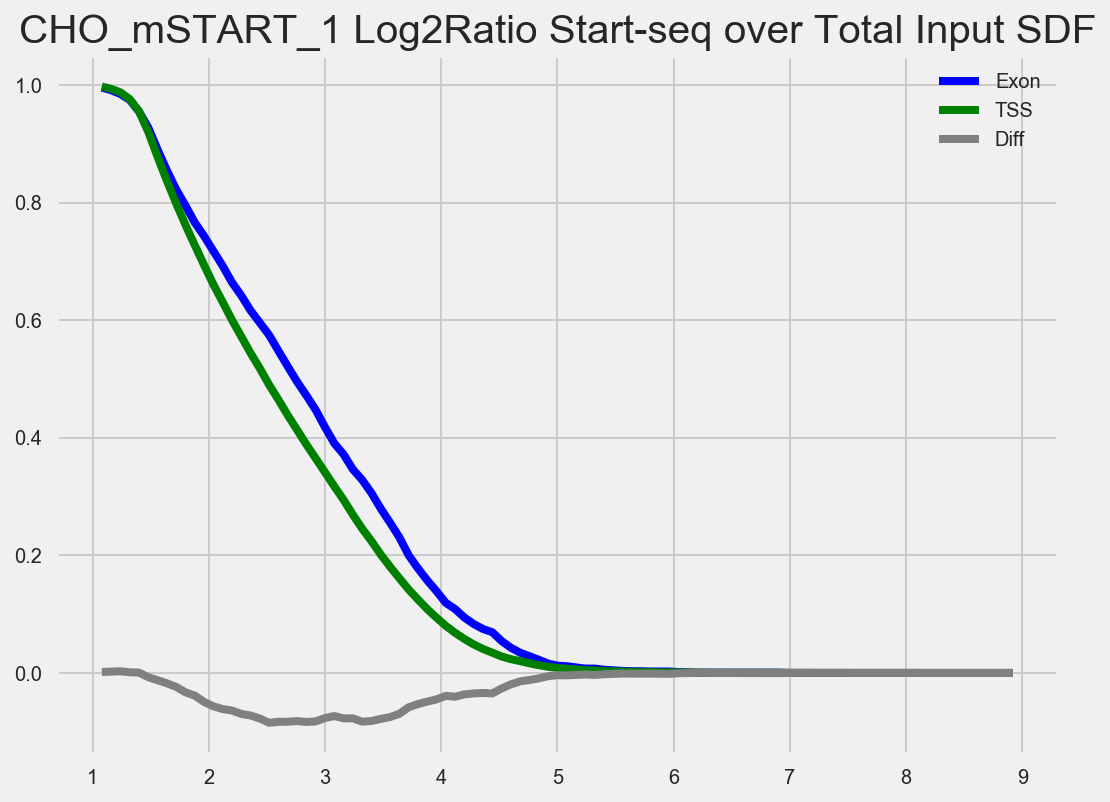

In [44]:
f = plt.figure()

## Setup bin edges
num_bins = 100
concat = np.concatenate((np.array(exon_peaks['Log2Ratio vs. Input']),np.array(peaks['Log2Ratio vs. Input'])))
step = np.ceil(np.ceil(concat.max()) - np.floor(concat.min()))/num_bins
bins = np.arange(np.floor(concat.min()),np.ceil(concat.max()),step)

## Exon peaks
counts_exon, bin_edges = np.histogram (exon_peaks['Log2Ratio vs. Input'], bins=bins, density=True)
cdf_exon = np.cumsum(counts_exon)
cdf_exon = cdf_exon/cdf_exon[-1]
sdf_exon = 1-cdf_exon
plt.plot(bin_edges[1:], sdf_exon,label='Exon')

## TSS peaks
counts_tss, bin_edges = np.histogram (peaks['Log2Ratio vs. Input'], bins=bins, density=True)
cdf_tss = np.cumsum(counts_tss)
cdf_tss = cdf_tss/cdf_tss[-1]
sdf_tss = 1-cdf_tss
plt.plot(bin_edges[1:], sdf_tss,color='g',label='TSS')

plt.plot(bin_edges[1:],sdf_tss-sdf_exon,color='gray',label='Diff')


plt.legend();
plt.title(name + ' Log2Ratio Start-seq over Total Input SDF' );
